# 0. Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.offsetbox import (OffsetImage,AnnotationBbox)
from matplotlib import transforms
import matplotlib.animation as animation
import time as time

sns.set_theme()

# 2. Data Understanding
Trên thực tế việc khám phá dữ liệu đã được nhóm thực hiện một phần ở notebook Data Preprocessing. Ở notebook này, nhóm chủ yếu tìm hiểu sự phân bố của dữ liệu ở các cột

In [ ]:
df = pd.read_csv('data/kill_match_stats_v2.csv')
df.head()

,killed_by,type,time,phase,dis,kx,ky,vx,vy
0,M16A4,AR,1035,2,194,4970,3126,4978,3320
1,AKM,AR,1422,4,7,4604,4147,4598,4144
2,AKM,AR,1210,3,8,4880,3472,4874,3477
3,SKS,DMR,1818,7,124,5011,4251,4930,4345
4,M416,AR,1766,7,85,4955,4298,4958,4383


### 2.3.3. Trung bình khoảng cách theo thời gian

<AxesSubplot:title={'center':'Average distance by time (included Bluezone)'}, xlabel='time'>

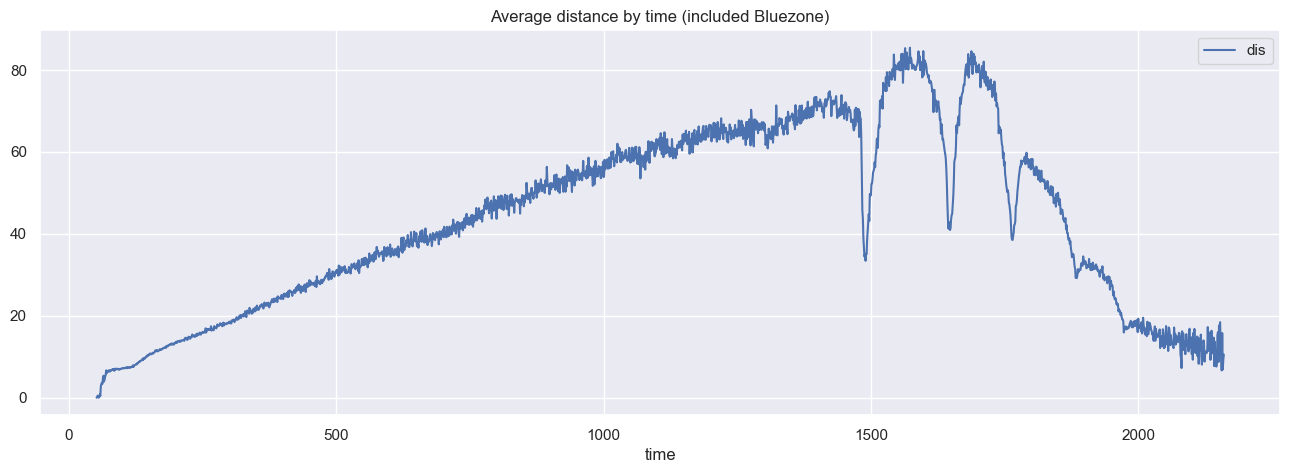

In [ ]:
df[['time', 'dis']].groupby(by = ['time']).mean().plot(figsize = (16, 5), title = 'Average distance by time (included Bluezone)')

<AxesSubplot:title={'center':'Average distance by time (excluded Bluezone)'}, xlabel='time'>

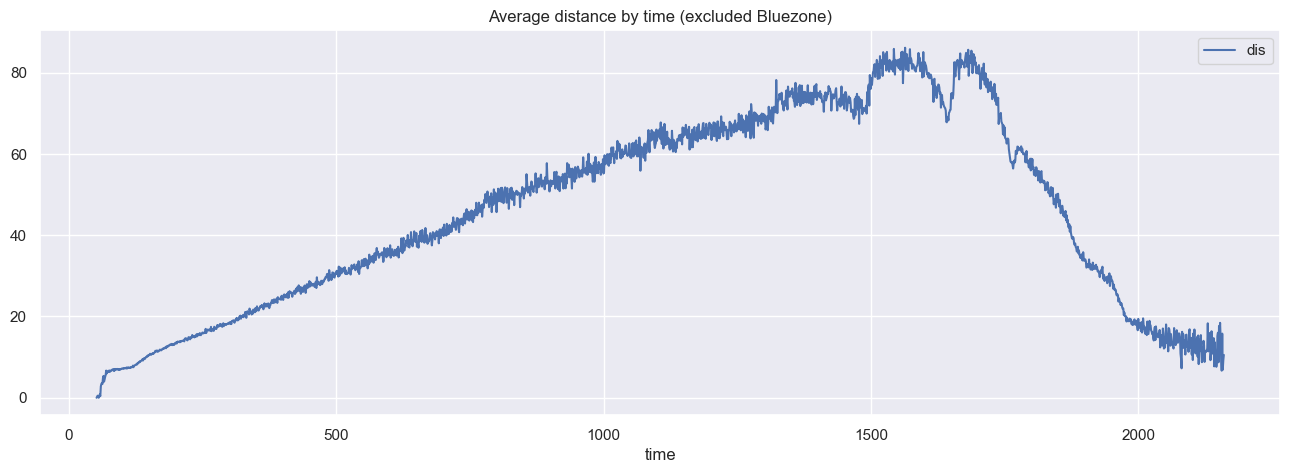

In [ ]:
df[df['killed_by'] != 'BlueZone'][['time', 'dis']].groupby(by = ['time']).mean().plot(figsize = (16, 5), title = 'Average distance by time (excluded Bluezone)')

Text(0.5, 1.0, 'Top 6 lower of Type average distance by time')

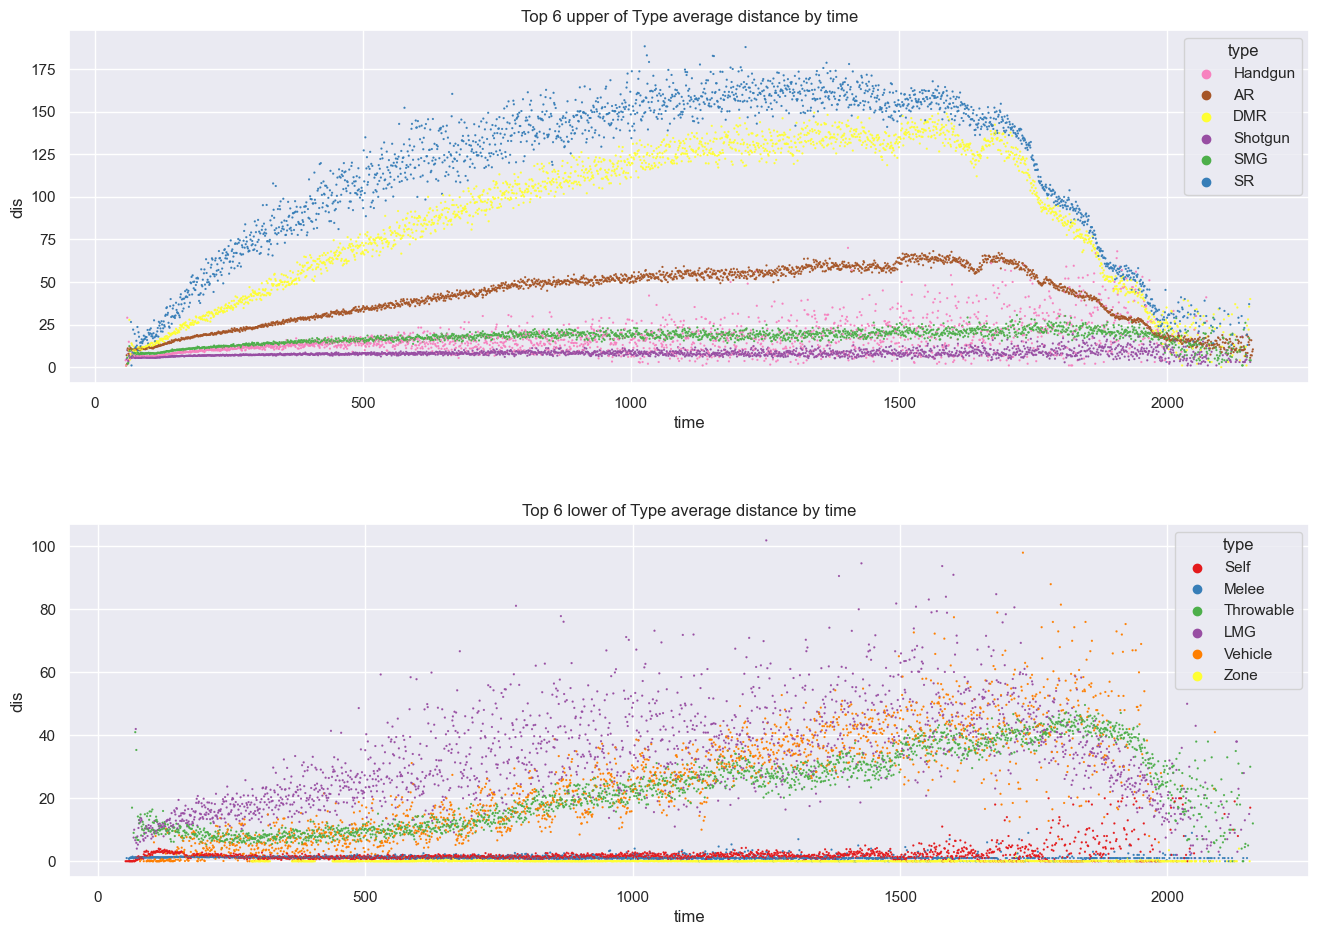

In [ ]:
fig, axes = plt.subplots(nrows = 2, figsize = (16, 11))
fig.subplots_adjust(hspace = 0.4)

data = df[df['type'].isin(df['type'].value_counts()[0:6].index)][['time', 'type', 'dis']].groupby(by = ['time', 'type']).mean().reset_index()
sns.scatterplot(data = data, x = 'time', y = 'dis', hue = 'type', palette = 'Set1_r', ax = axes[0], s = 2, edgecolor = None)
axes[0].set_title('Top 6 upper of Type average distance by time')

data = df[df['type'].isin(df['type'].value_counts()[6:].index)][['time', 'type', 'dis']].groupby(by = ['time', 'type']).mean().reset_index()
sns.scatterplot(data = data, x = 'time', y = 'dis', hue = 'type', palette = 'Set1', ax = axes[1], s = 2, edgecolor = None)
axes[1].set_title('Top 6 lower of Type average distance by time')